<a href="https://colab.research.google.com/github/flaviorv/ml_clustering/blob/main/clustering_tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_circles, fetch_olivetti_faces, fetch_covtype
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

###Make Circles Dataset

DBSCAN

Scores:
ARI 1.0
NMI: 1.0
Silhouette: 0.3055901730865165


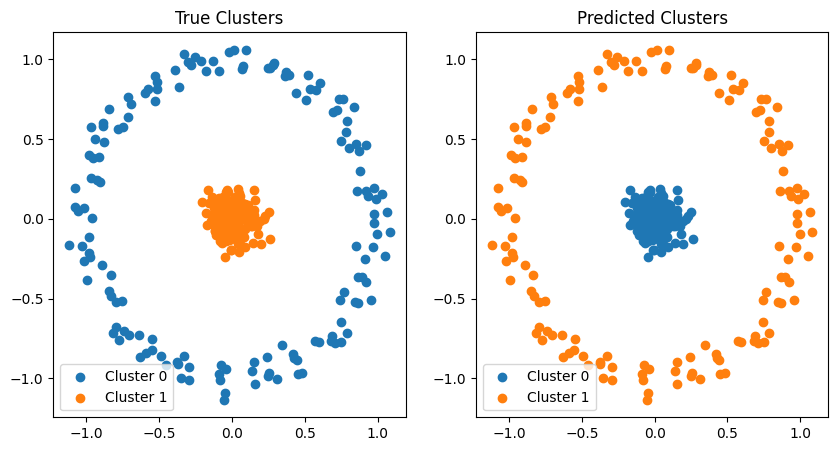

In [ ]:
def plot_scatters(x, y_true, y_pred):
  fig, axes = plt.subplots(1, 2, figsize=(10,5))
  for ax, y, y_type in zip(axes, [y_true, y_pred], ['True', 'Predicted']):
    classes = np.unique(y)
    for c in classes:
      ax.scatter(x[y == c, 0], x[y == c, 1], label=f'Cluster {c}')
    ax.set_title(f'{y_type} Clusters')
    if len(classes) < 4:
      ax.legend()
  plt.show()

def cluster_scores(x, y_true, y_pred, title=None):
  print(title) if title else None
  print('ARI', adjusted_rand_score(y_true, y_pred))
  print('NMI:', normalized_mutual_info_score(y_true, y_pred))
  if len(np.unique(y_pred)) > 1:
    print('Silhouette:', silhouette_score(x, y_pred))

x, y = make_circles(n_samples=300, factor= 0.1, noise=0.06, random_state=42)

dbscan = DBSCAN()
dbscan_pred = dbscan.fit_predict(x)

cluster_scores(x, y, dbscan_pred, 'Scores:')
plot_scatters(x, y, dbscan_pred)

DBSCAN - Best Hyperparameters

DBSCAN: eps=0.1, min_samples=2
ARI 0.526693717124589
NMI: 0.4799506504077054
Silhouette: 0.5948134901892417


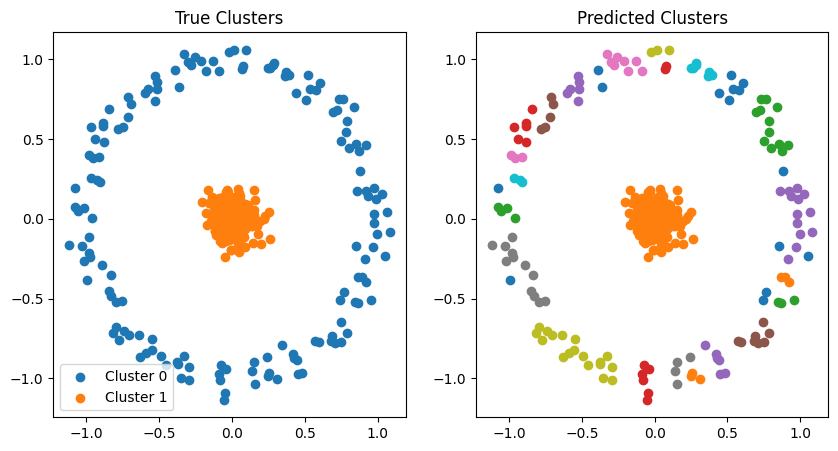

DBSCAN: eps=0.1, min_samples=10
ARI 1.0
NMI: 1.0
Silhouette: 0.3055901730865165


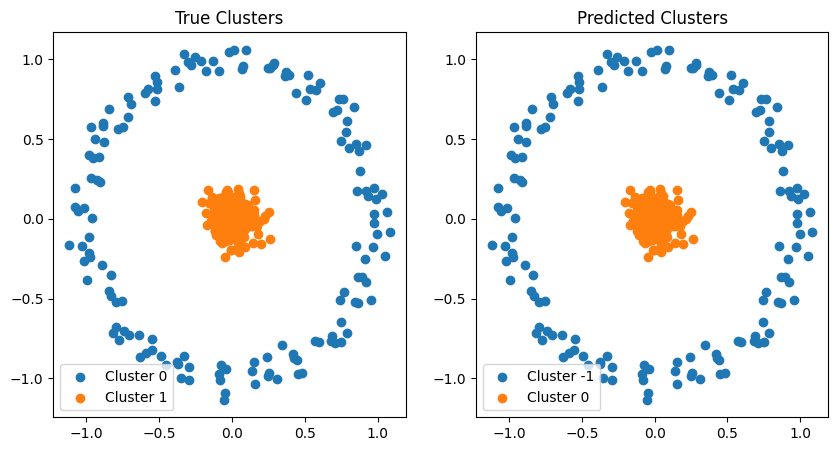

DBSCAN: eps=0.1, min_samples=50
ARI 0.6281873694165534
NMI: 0.6109151205665379
Silhouette: 0.15996851854923372


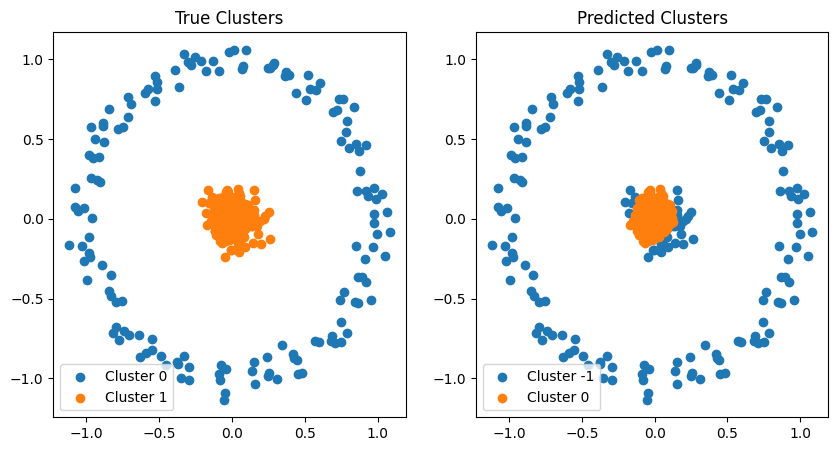

DBSCAN: eps=0.3, min_samples=2
ARI 1.0
NMI: 1.0
Silhouette: 0.3055901730865165


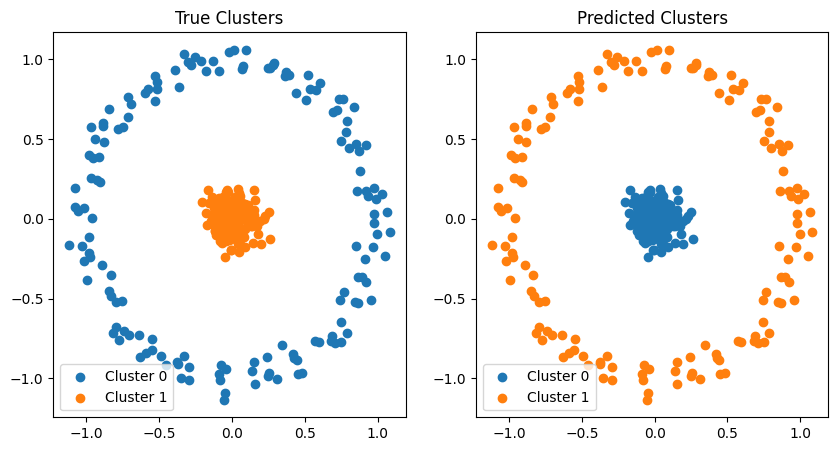

DBSCAN: eps=0.3, min_samples=10
ARI 1.0
NMI: 1.0
Silhouette: 0.3055901730865165


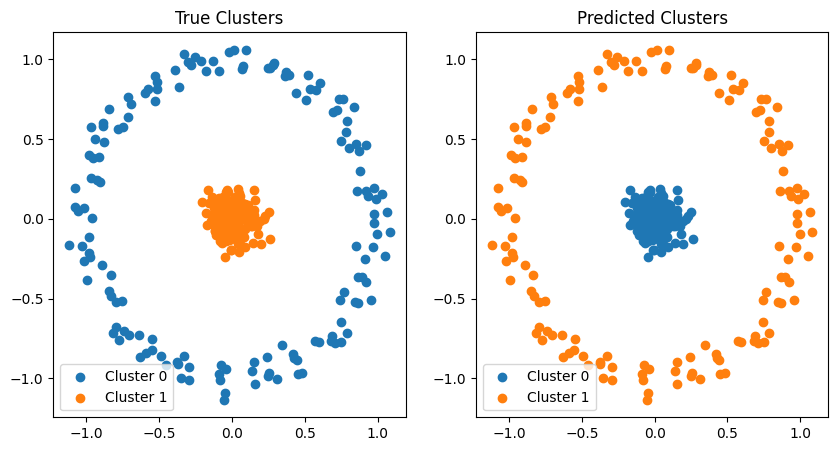

DBSCAN: eps=0.3, min_samples=50
ARI 1.0
NMI: 1.0
Silhouette: 0.3055901730865165


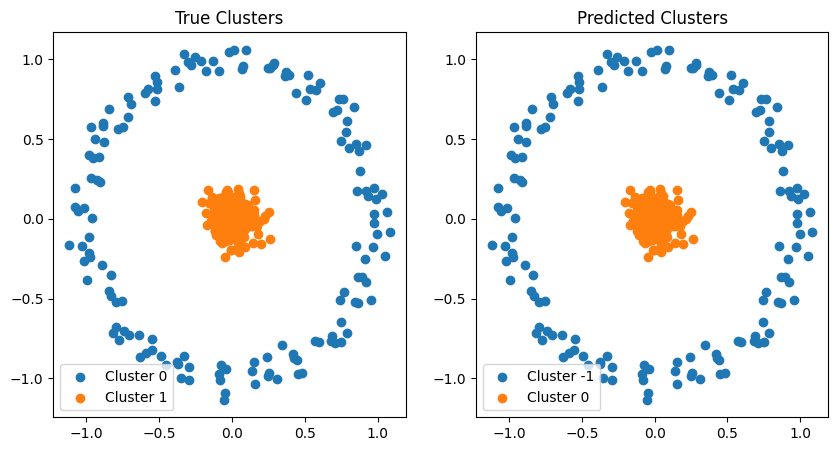

DBSCAN: eps=0.7, min_samples=2
ARI 0.0
NMI: 0.0


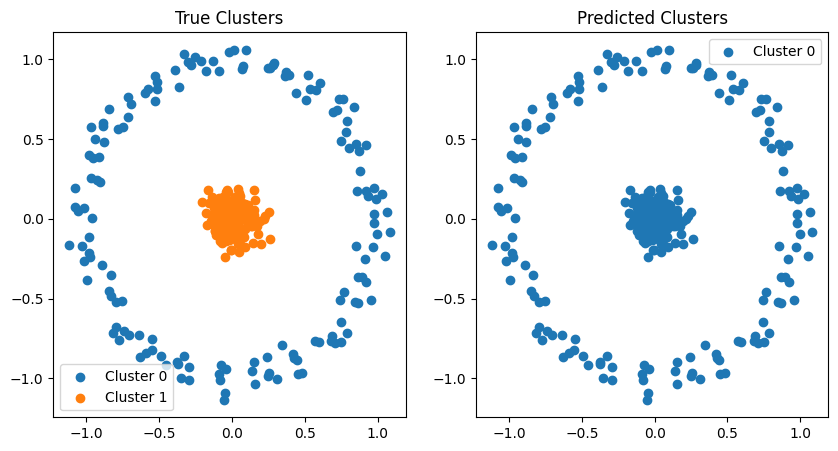

DBSCAN: eps=0.7, min_samples=10
ARI 0.0
NMI: 0.0


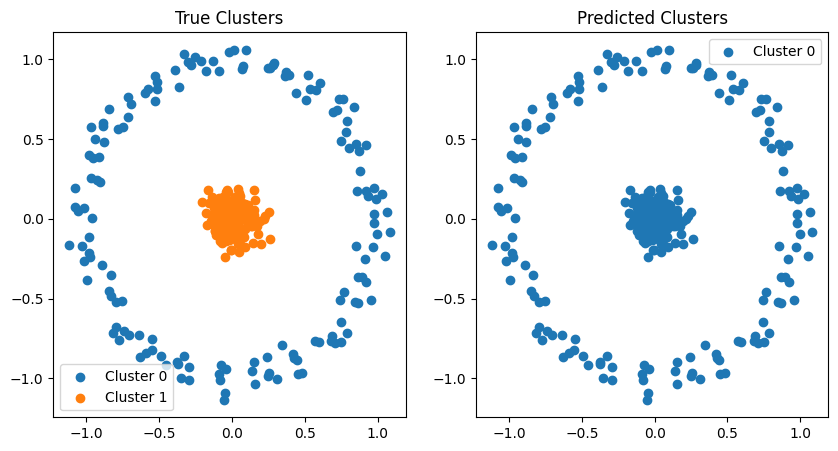

DBSCAN: eps=0.7, min_samples=50
ARI 0.7387433578194186
NMI: 0.6986507991630136
Silhouette: 0.3099495407697615


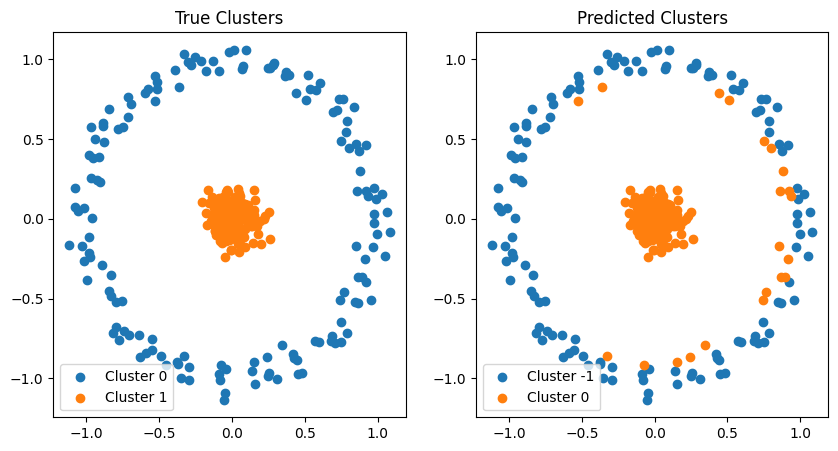

In [ ]:
eps = [0.1, 0.3, 0.7]
min_samples = [2, 10, 50]

def dbscan_grid(x, y, eps_list, min_samples_list, chart=True):
  for eps in eps_list:
    for min_samples in min_samples_list:
      dbscan = DBSCAN(eps=eps, min_samples=min_samples)
      y_pred = dbscan.fit_predict(x)
      cluster_scores(x, y, y_pred, f'DBSCAN: eps={eps}, min_samples={min_samples}')
      plot_scatters(x, y, y_pred)

dbscan_grid(x, y, eps, min_samples)

KMeans and Agglomerative Clustering

Kmeans Scores:
ARI 0.169021789003126
NMI: 0.28351005642627564
Silhouette: 0.4221981914929439


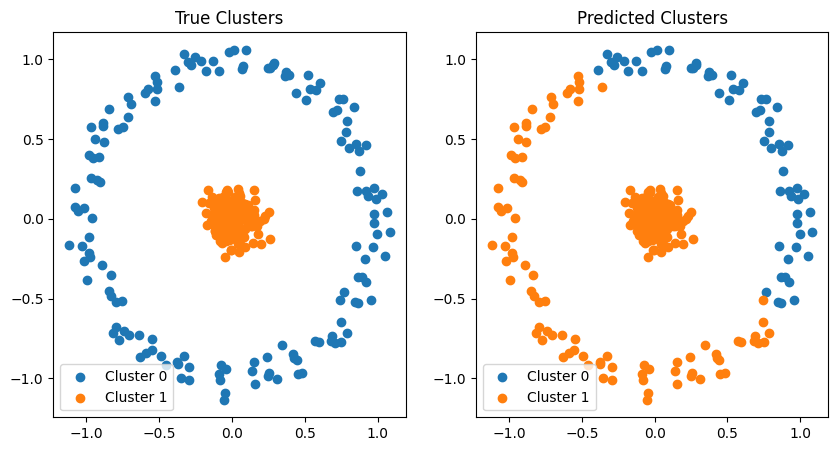

Agglomerative Clustering Scores:
ARI 0.13270728065504672
NMI: 0.2527992216037697
Silhouette: 0.42882236474093866


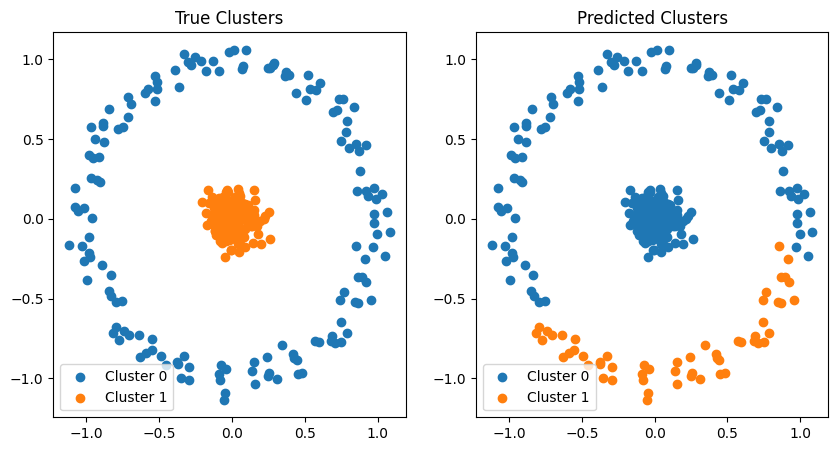

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans_pred = kmeans.fit_predict(x)

cluster_scores(x, y, kmeans_pred, 'Kmeans Scores:')
plot_scatters(x, y, kmeans_pred)

agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_pred = agglomerative.fit_predict(x)

cluster_scores(x, y, agglomerative_pred, 'Agglomerative Clustering Scores:')
plot_scatters(x, y, agglomerative_pred)

###Forest Cover Types Dataset

Choosing the number of PCA components

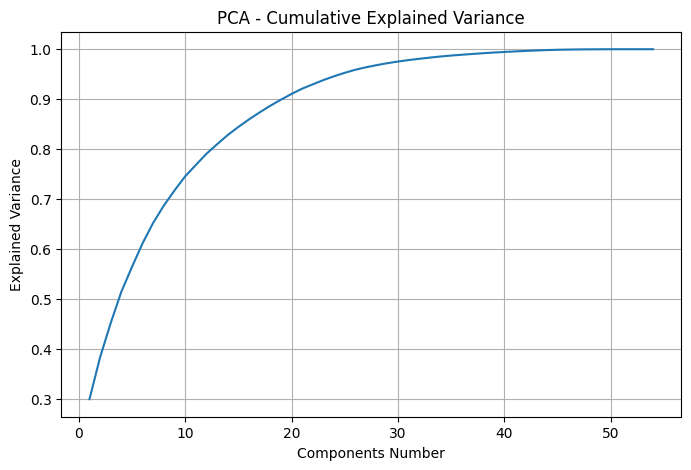

In [ ]:
cover_type_map = {
  1: 'Spruce/Fir',
  2: 'Lodgepole Pine',
  3: 'Ponderosa Pine',
  4: 'Cottonwood/Willow',
  5: 'Aspen',
  6: 'Douglas-fir',
  7: 'Krummholz'
}

def count_classes(y_true, y_pred):
  true_mapped = np.vectorize(cover_type_map.get)(y_true)
  pred_mapped = np.vectorize(cover_type_map.get)(y_pred)

  true_classes, true_counts = np.unique(true_mapped, return_counts=True)
  pred_classes, pred_counts = np.unique(pred_mapped, return_counts=True)

  df = pd.DataFrame({'Classes': true_classes, 'True Counts': true_counts, 'Predicted Counts': pred_counts})
  print(df)

dataset = fetch_covtype()

x_fc = dataset.data
y_fc = dataset.target

continuous_features = x_fc[:, :10]
binary_features = x_fc[:, 10:]

min_max = MinMaxScaler()
continuous_scaled = min_max.fit_transform(continuous_features)

x_fc_preprocessed = np.concatenate([continuous_scaled, binary_features], axis=1)

pca = PCA()
pca.fit(x_fc_preprocessed)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) +1), cumulative_variance)
plt.title('PCA - Cumulative Explained Variance')
plt.xlabel('Components Number')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

DBSCAN

In [ ]:
sampling_strategy = {
  1: 3000,
  2: 3000,
  3: 3000,
  4: 2747,
  5: 3000,
  6: 3000,
  7: 3000
}

under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
x_fc_res, y_fc_res = under_sampler.fit_resample(x_fc, y_fc)

continuous_x_res = x_fc_res[:, :10]
binary_x_res = x_fc_res[:, 10:]

scaler = MinMaxScaler()
x_res_scaled = scaler.fit_transform(continuous_x_res)

xp = np.concatenate([x_res_scaled, binary_x_res], axis=1)

pca = PCA(n_components=45)
xc = pca.fit_transform(xp)

dbscan = DBSCAN(eps=1.1, min_samples=15)
y_pred = dbscan.fit_predict(xc)

print("\nNumber of each Cover Type by DBSCAN cluster:")
contingency_table = pd.crosstab(
  index=y_fc_res,
  columns=y_pred,
  rownames=['Cover Type'],
  colnames=['DBSCANCluster']
)
mapped_contingency = contingency_table.rename(index=cover_type_map)
print(mapped_contingency)

proportions_by_cluster = pd.crosstab(
  index=y_fc_res,
  columns=y_pred,
  normalize='columns',
  rownames=['Cover Type'],
  colnames=['DBSCANCluster']
)
mapped_proportions = proportions_by_cluster.rename(index=cover_type_map)
print("\nProportion of each Cover Type by DBSCAN cluster:")
print(mapped_proportions.round(2))


Number of each Cover Type by DBSCAN cluster:
DBSCANCluster      -1     0    1     2    3     4
Cover Type                                       
Spruce/Fir         12  1235  237  1513    3     0
Lodgepole Pine     11  1322   90  1543    2    32
Ponderosa Pine      0  1193    0     0    0  1807
Cottonwood/Willow   0     0    0     0    0  2747
Aspen               0  1817    0  1183    0     0
Douglas-fir         0  1318    0     0    0  1682
Krummholz           9  1582  333   791  285     0

Proportion of each Cover Type by DBSCAN cluster:
DBSCANCluster        -1     0     1     2     3     4
Cover Type                                           
Spruce/Fir         0.38  0.15  0.36  0.30  0.01  0.00
Lodgepole Pine     0.34  0.16  0.14  0.31  0.01  0.01
Ponderosa Pine     0.00  0.14  0.00  0.00  0.00  0.29
Cottonwood/Willow  0.00  0.00  0.00  0.00  0.00  0.44
Aspen              0.00  0.21  0.00  0.24  0.00  0.00
Douglas-fir        0.00  0.16  0.00  0.00  0.00  0.27
Krummholz          0.2

###Olivetti Faces Dataset

Showing images

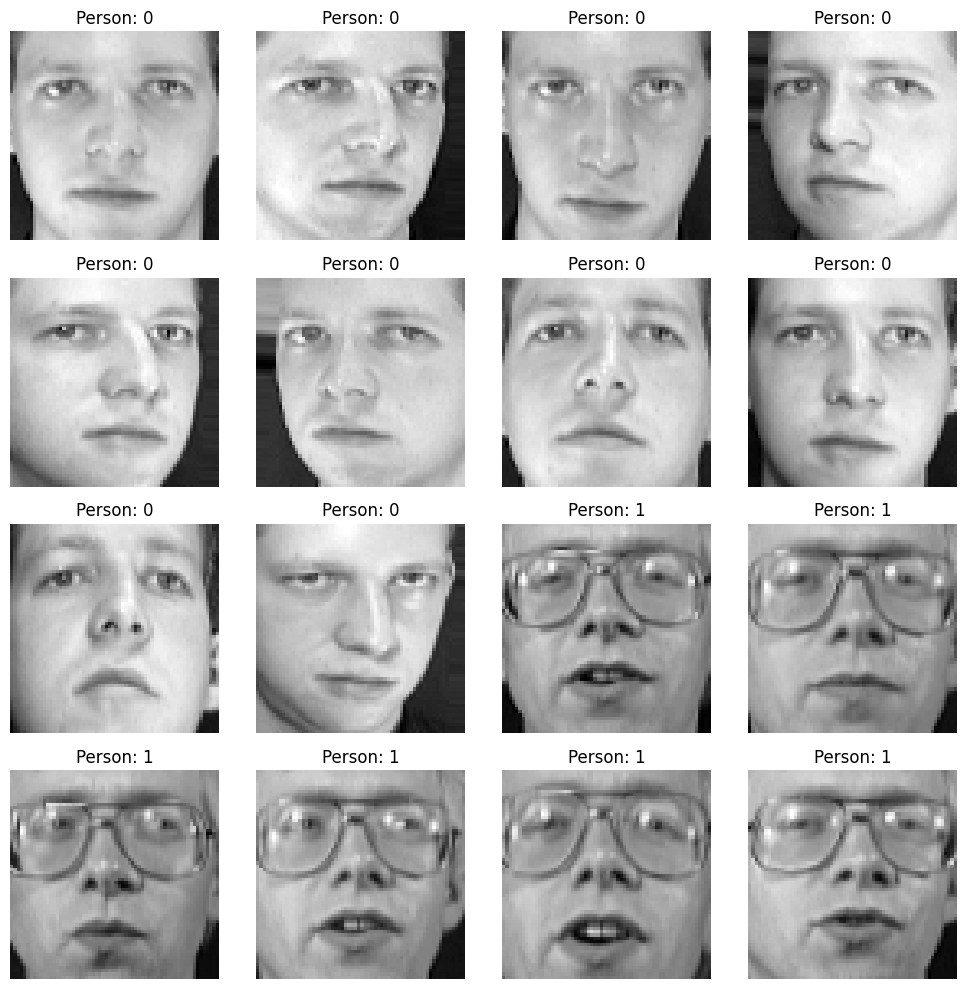

In [ ]:
def show_images():
  fig, axes = plt.subplots(4,4, figsize=(10, 10))
  for i, ax in enumerate(axes.flat):
    ax.imshow(dataset.images[i], cmap='gray')
    ax.set_title(f'Person: {dataset.target[i]}')
    ax.axis('off')
  plt.tight_layout()
  plt.show()

dataset = fetch_olivetti_faces()
show_images()

KMeans x Agglomerative x DBSCAN

In [ ]:
kmeans = KMeans(n_clusters=40)
kmeans_pred = kmeans.fit_predict(dataset.data)

cluster_scores(dataset.data, dataset.target, kmeans_pred, title='KMeans Score:')

agglomerative = AgglomerativeClustering(n_clusters=40, linkage='ward')
agglomerative_pred = agglomerative.fit_predict(dataset.data)

cluster_scores(dataset.data, dataset.target, agglomerative_pred, title='\nAgglomerative Score')

dbscan = DBSCAN(eps=6.8, min_samples=3)
dbscan_pred = dbscan.fit_predict(dataset.data)

cluster_scores(dataset.data, dataset.target, dbscan_pred, title='\nDBSCAN Score')

KMeans Score:
ARI 0.40092587725419754
NMI: 0.7563771703093759
Silhouette: 0.13299453

Agglomerative Score
ARI 0.49147538523205436
NMI: 0.8126661774838002
Silhouette: 0.16167718

DBSCAN Score
ARI 0.1344760805867821
NMI: 0.6873085309756859
Silhouette: 0.057310976
